<a href="https://colab.research.google.com/github/colinchu1/CAP4630/blob/master/HW_2/HW_2(problem2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports



In [0]:
from mpl_toolkits import mplot3d

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Generating Random Data

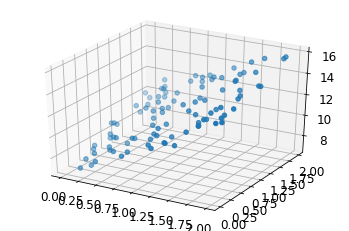

In [74]:

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
X2 = 2 * np.random.rand(m, 1)
Z = (4 + 3 * X) + (2 + 2 * X2) + np.random.rand(100, 1)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X, X2, Z, cmap='blues');

In [0]:
X_b = np.column_stack([np.ones((m, 1)), X, X2])
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01

weight = np.random.randn(3, 1) 

#Mini batch gradient descent

In [0]:
weight_path_mgd = []
weight_path_mgd.append(weight)

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    Z_shuffled = Z[shuffled_indices]
    
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        zi = Z_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - zi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

#Displaying Prediction

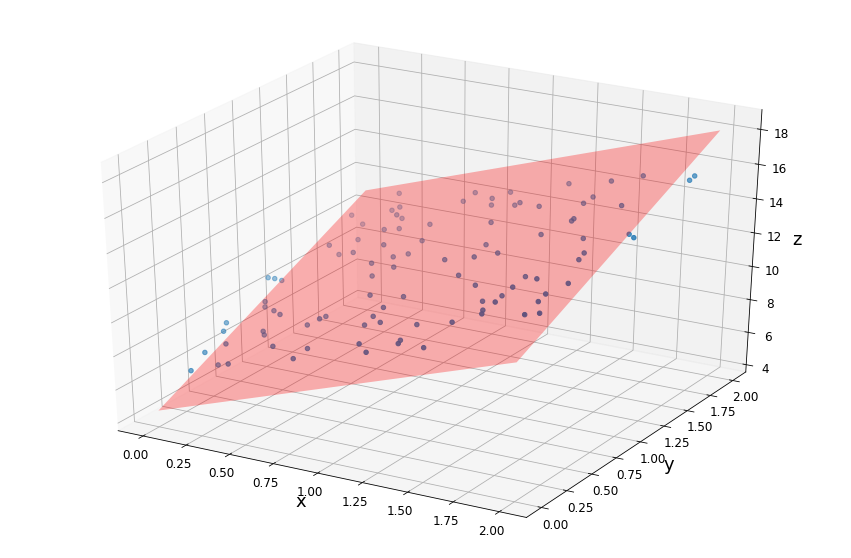

In [80]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X, X2, Z, 'b.')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)


x = y = np.linspace(0,2,2)
X1, Y1 = np.meshgrid(x, y)
Z1 = weight[0] + (weight[1] * X1) + (weight[2] * Y1)
ax.plot_surface(mX, mY, mZ, color='red', alpha=0.3)

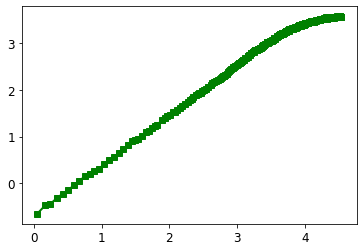

In [81]:
weight_path_mgd = np.array(weight_path_mgd)
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")